In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.cm as cm

In [ ]:
!pip install folium
import folium

In [2]:
# df_death = pd.read_csv('Deaths.csv')
# df_rec = pd.read_csv('Recovered.csv')
# df_con = pd.read_csv('Confirmed.csv')
df_con = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [ ]:
# df_death[df_death['Country/Region'] == 'Pakistan']
# df_death['Country/Region']

In [4]:
df_death.drop(['Province/State'],axis = 1,inplace = True)
df_rec.drop(['Province/State'],axis = 1,inplace = True)
df_con.drop(['Province/State'],axis = 1,inplace = True)

In [ ]:
# df.set_index('Country/Region',inplace = True)
df_death['Total'] = df_death.sum(axis = 1)
df_con['Total'] = df_death.sum(axis = 1)
df_rec['Total'] = df_death.sum(axis = 1)

In [5]:
df_death = df_death.set_index('Country/Region')
df_con = df_con.set_index('Country/Region')
df_rec = df_rec.set_index('Country/Region')

In [6]:
df_death_sum = df_death.groupby('Country/Region').sum()
df_con_sum = df_con.groupby('Country/Region').sum()
df_rec_sum = df_rec.groupby('Country/Region').sum()

In [ ]:
# temp1 = df_rec_sum.loc['Kenya'].copy()
# temp2 = df_rec_sum.loc['Guinea'].copy()
# temp3 = df_rec_sum.loc['Canada'].copy()

# print(temp3)

# df_rec_sum.loc['Kenya'] = temp2
# df_rec_sum.loc['Guinea'] = temp3
# df_rec_sum.loc['Canada'] = temp1

# df_rec.rename(index={'Kenya': 'Guinea','Guinea':'Canada','Canada':'Kenya'},inplace = True)

In [14]:
data = pd.DataFrame(index = df_death_sum.index.values)
data['death'] = df_death_sum.iloc[:,-1]
data['confirmed'] = df_con_sum.iloc[:,-1]
data['recov'] = df_rec_sum.iloc[:,-1]

In [ ]:
# # columns = df_top.columns
# df_top.drop('Total',axis = 1).head(5)
# df_top.columns.name = 'days'
# # df_top
# df_top.head(5).T.plot(kind = 'line',figsize = (20,10),linewidth=2.5)

In [15]:
data_plot = data.sort_values('confirmed',ascending = False).head(8)

In [16]:
# data_plot.reset_index(inplace = True)

In [17]:
data_plot.head()

,death,confirmed,recov
China,3274.0,81439.0,72814.0
Italy,5476.0,59138.0,7024.0
US,417.0,33276.0,178.0
Spain,1772.0,28768.0,2575.0
Germany,94.0,24873.0,266.0


['China' 'Italy' 'US' 'Spain' 'Germany' 'Iran' 'France' 'Korea, South']


Text(0.5, 1.0, 'Deaths VS confirmed/recovered patients for top 8 countries')

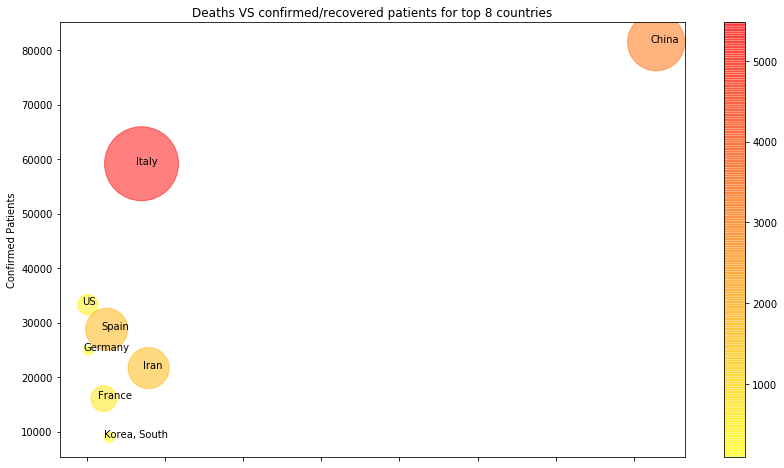

In [18]:
x = data_plot.recov.values
y = data_plot.confirmed.values
t = data_plot.death.values

ax = data_plot.plot(kind='scatter',
                    x='recov',
                    y='confirmed',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    s=data_plot.death.values,  # pass in weights 
                    c = t,
                    cmap = 'autumn_r'                   
                   )
n = data_plot.index.values
print(n)

for i, txt in enumerate(n):
    ax.annotate(str(txt), (x[i]-700, y[i]))
ax.set_xlabel('Recovered Patients')
ax.set_ylabel('Confirmed Patients')
ax.set_title('Deaths VS confirmed/recovered patients for top 8 countries')

In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [20]:
df_death.reset_index(inplace = True)
df_death.rename(columns = {'Country/Region':'country'},inplace = True)

In [58]:
# from folium import plugins

world_map = folium.Map(location = [30.3753, 69.3451],zoom_start = 5) #Starting location = Pakistan
folium.TileLayer('cartodbdark_matter').add_to(world_map)
cases = folium.map.FeatureGroup()


# for lat, lng, in zip(df_incidents.Y, df_incidents.X):
#     incidents.add_child(
#         folium.features.CircleMarker(
#             [lat, lng],
#             radius=5, # define how big you want the circle markers to be
#             color='yellow',
#             fill=True,
#             fill_color='blue',
#             fill_opacity=0.6
#         )
#     )

# add incidents to map
world_map.add_child(cases)
death = df_death.iloc[:,-1]
con = df_con.iloc[:,-1]
rec = df_rec.iloc[:,-1]
for i,(lat, lng, label) in enumerate(df_death[['Lat','Long','country']].values):
    if death[i] == 0 or np.isnan(death[i]):
        continue
    if rec[i] == 0 or np.isnan(rec[i]):
        continue
    if con[i] == 0 or np.isnan(con[i]):
        continue
    cases.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=int(radius[i]/100), 
#             color='red',
            fill=True,
#             popup=label,
            popup = 'C = '+str(con[i])+'\n'+'D = '+str(death[i])+'\n'+'R = '+str(rec[i]),
            fill_color='red',
            fill_opacity=0.3,
            opacity = 0.3
        )).add_to(world_map)
    
world_map.add_child(folium.ClickForMarker(popup="COVID-19"))

world_map